In [1]:
from array import array
import numpy as np
import math

# Projectile Motion - Simple Case with No Air Resistance

Why study this problem?  The analytical solution is well known.  Well, once again, the point is to understand the numerical techniques and algorithms, and establish the reliability of those algorithms, so that when we include air resistance, we can tell if the differences between the analytical solution (for no air resistance) and the numerical solution (with air resistance) are due to the inclusion of air resistance or due to numerical issues.

Projectile motion in two dimensions is governed by a fairly simple set of coupled differential equations:

The acceleration components are defined as:

$$ a_x(t) = \frac{F_x(t)}{m} = \frac{d v_x(t)}{dt}$$
$$ a_y(t) = \frac{F_y(t)}{m} = \frac{d v_y(t)}{dt}$$

The velocity components are defined as:

$$ v_x(t) = \frac{d x(t)}{dt}$$
$$ v_y(t) = \frac{d y(t)}{dt}$$

Below, we will look at several ways of solving these differential equations, numerically.

With that said, it is true that we will always need to know a set of initial conditions:  the initial velocity in the x- and y-directions, and the initial position in the x- and y-directions:  $v_x(0) = v_{x0}, v_y(0) = v_{y0}, x(0) = x_0, y(0) = y_0$



In [2]:
# Initial Conditions
speed = 50.0
theta = 45.0
y1 = 2.0


# Other constants
grav = 9.81 # gravitional acceleration
Pi = math.pi

# Component Setup

In an attempt to frame the problem in a way that is more easily extensible to three dimensions, we create two-component vectors for the position, velocity, and acceleration.  The components of these vectors are defined as:

In [3]:
# Initial position
r1 = array('d')
# Initial velocity
v1 = array('d')
# Position as a function of time
r = array('d')
# Velocity as a function of time
v = array('d')
# Acceleration as a function of time
accel = array('d')

# Set the initial values of position and velocity
r1.append(0)
r1.append(y1)
v1.append(speed*math.cos(theta*Pi/180.0))
v1.append(speed*math.sin(theta*Pi/180.0))

# Set the first elements of the position and velocity arrays
r.append(r1[0])
r.append(r1[1])
v.append(v1[0])
v.append(v1[1])

# Set the first elements of the acceleration array (in this problem, the acceleration is constant, but in general it might not be)
accel.append(0)
accel.append(-grav)

# Euler Method

The Euler method is the simplest of the numerical methods for solving differential equations.  It is based on the idea that the derivative of a function can be approximated by a finite difference.  In the case of the Euler method, the derivative is approximated by the slope of the tangent line at the beginning of the interval.  The slope of the tangent line is given by the derivative of the function at the beginning of the interval.  The derivative of the function is approximated by the finite difference:

$$ \frac{df}{dt} \approx \frac{f(t+\tau)-f(t)}{\tau}$$

where $\tau$ is the time step.  The Euler method is then given by:

$$ f(t+\tau) = f(t) + \tau \frac{df}{dt}$$

Applying this to the position and velocity components, we get:

$$ x(t+\tau) = x(t) + \tau v_x(t)$$
$$ y(t+\tau) = y(t) + \tau v_y(t)$$
$$ v_x(t+\tau) = v_x(t) + \tau a_x(t)$$
$$ v_y(t+\tau) = v_y(t) + \tau a_y(t)$$

A really important point to note here is the everything on the RHS of these equations is at the $current$ time, and everything on the LHS is at the $next$ time.

In [4]:
tau_value = 0.2 # timestep in seconds ... set ONCE here for the whole notebook.

tau = tau_value # timestep in seconds
maxStep = 1000000 # maximum number of steps

# Create arrays to store the x and y positions and velocities as a function of time as well as the time, itself, for both the numerical method and the analytical method (NoAir).
xplot = array('d')
yplot = array('d')
xNoAir = array('d')
yNoAir = array('d')
time = array('d')
timeNoAir = array('d')

In [5]:
endtime = 0
nelements = 0

# start looping ... we will break out of this loop when:
# a) the projectile hits the ground (y < 0)
# b) the y-velocity is negative (i.e., the projectile is moving down)
# 


for iStep in range(1,maxStep+1):
    xplot.append(r[0])
    yplot.append(r[1])
    t = (iStep-1)*tau
    timeNoAir.append(t)
    xNoAir.append(r1[0]+v1[0]*t)
    yNoAir.append(r1[1]+v1[1]*t-0.5*grav*t*t)
    accel[0]=0.0
    accel[1]=-1.0*grav
    
    # Euler Method
    r[0] = r[0] + tau*v[0]
    r[1] = r[1] + tau*v[1]
    v[0] = v[0] + tau*accel[0]
    v[1] = v[1] + tau*accel[1]
    
    # Euler-Cromer Method
    #v[0] = v[0] + tau*accel[0]
    #v[1] = v[1] + tau*accel[1]    
    #r[0] = r[0] + tau*v[0]
    #r[1] = r[1] + tau*v[1]
    
    # MidPoint Method
    # vxnew = v[0] + tau*accel[0]
    # vynew = v[1] + tau*accel[1]
    # r[0] = r[0] + tau*(v[0] + vxnew)/2.0
    # r[1] = r[1] + tau*(v[1] + vynew)/2.0
    # v[0] = vxnew
    # v[1] = vynew
    
    #print ("x = %f     vx = %f    ax = %f" %(r[0],v[0],accel[0]))
    #print ("y = %f     vy = %f    ay = %f" %(r[1],v[1],accel[1]))
    
    time.append(tau*(iStep-1))
    
    if (r[1] < 0):
        xplot.append(r[0])
        yplot.append(r[1])
        time.append(tau*iStep)
        endtime = tau*iStep
        nelements = iStep
        break
        
max_y = np.amax(yplot)+1
max_x = np.amax(xplot)+1
max_t = np.amax(time)+1

print ("Maximum range is %f meters." % r[0])
print ("Theory maximum range is %f meters." % (speed*speed/grav*math.sin(2.0*theta*Pi/180.0)))
print (" ")

print ("Time of flight is %f seconds." % (max_t-1))
print ("Theory time of flight is %f seconds." % (2.0*speed/grav*math.sin(theta*Pi/180.0)))
print (" ")

print ("Max y = %f" % (max_y-1))
print ("Theory Max y = %f" % (speed*speed/(2.0*grav)*math.pow(math.sin(theta*Pi/180.0),2)))
print (" ")


print ("Number of elements = %d" % nelements)

Maximum range is 268.700577 meters.
Theory maximum range is 254.841998 meters.
 
Time of flight is 7.600000 seconds.
Theory time of flight is 7.208020 seconds.
 
Max y = 69.249888
Theory Max y = 63.710499
 
Number of elements = 38


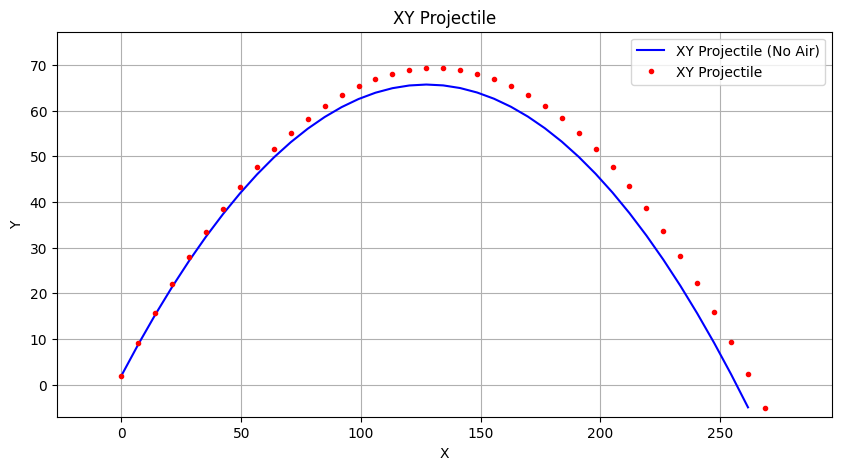

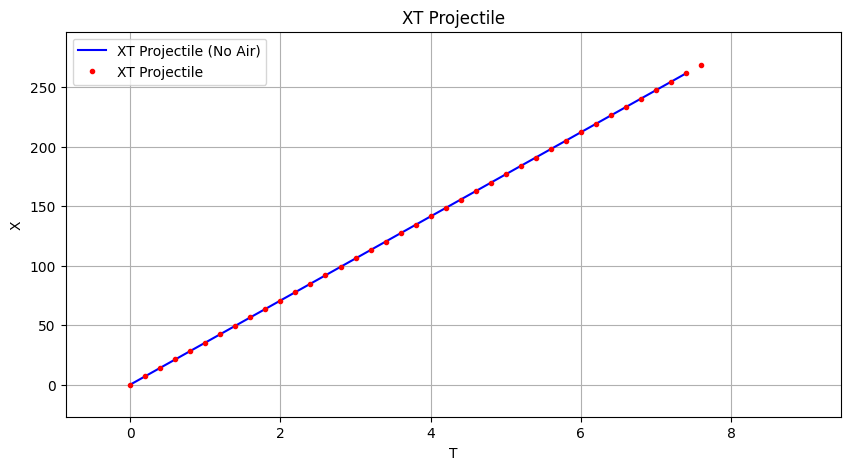

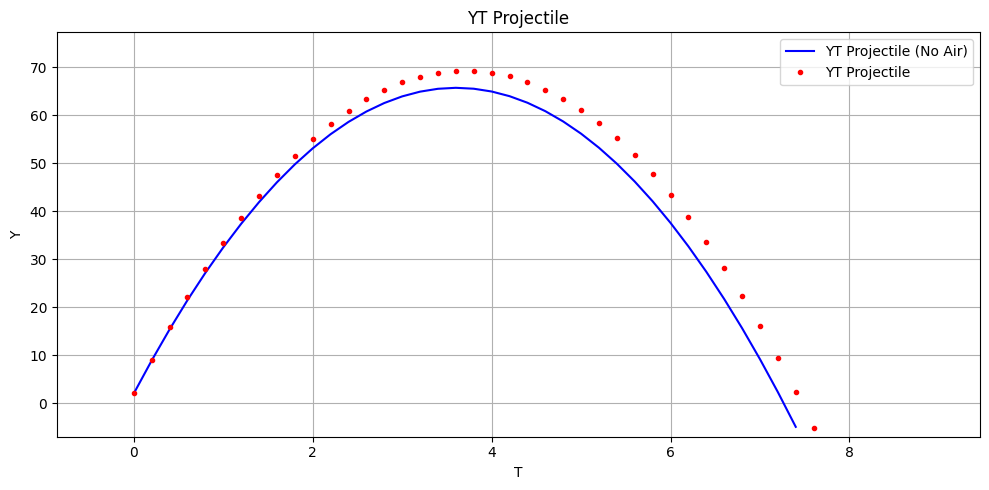

In [6]:
import matplotlib.pyplot as plt
import numpy as np

xcanvas = 1000
ycanvas = 500

# Create figures and axes for the XY projectile plot, XT projectile plot, and YT projectile plot
fig1, ax1 = plt.subplots(figsize=(xcanvas / 100, ycanvas / 100))
fig2, ax2 = plt.subplots(figsize=(xcanvas / 100, ycanvas / 100))
fig3, ax3 = plt.subplots(figsize=(xcanvas / 100, ycanvas / 100))

# Plot the XY projectile data
ax1.plot(xNoAir, yNoAir, 'b-', label='XY Projectile (No Air)')
ax1.plot(xplot, yplot, 'r.', label='XY Projectile')
ax1.set_title('XY Projectile')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_xlim(-0.1 * max_x, 1.1 * max_x)
ax1.set_ylim(-0.1 * max_y, 1.1 * max_y)
ax1.grid()
ax1.legend()

# Plot the XT projectile data
ax2.plot(timeNoAir, xNoAir, 'b-', label='XT Projectile (No Air)')
ax2.plot(time, xplot, 'r.', label='XT Projectile')
ax2.set_title('XT Projectile')
ax2.set_xlabel('T')
ax2.set_ylabel('X')
ax2.set_xlim(-0.1 * max_t, 1.1 * max_t)
ax2.set_ylim(-0.1 * max_x, 1.1 * max_x)
ax2.grid()
ax2.legend()

# Plot the YT projectile data
ax3.plot(timeNoAir, yNoAir, 'b-', label='YT Projectile (No Air)')
ax3.plot(time, yplot, 'r.', label='YT Projectile')
ax3.set_title('YT Projectile')
ax3.set_xlabel('T')
ax3.set_ylabel('Y')
ax3.set_xlim(-0.1 * max_t, 1.1 * max_t)
ax3.set_ylim(-0.1 * max_y, 1.1 * max_y)
ax3.grid()
ax3.legend()

# Show the plots
plt.tight_layout()
plt.show()

# Euler-Cromer Method

The Euler-Cromer method is a slight modification of the Euler method.  The only difference is that the velocity is updated before the position.  This is done to make the algorithm more stable.  The Euler-Cromer method is given by:

$$ v_x(t+\tau) = v_x(t) + \tau a_x(t)$$
$$ v_y(t+\tau) = v_y(t) + \tau a_y(t)$$
$$ x(t+\tau) = x(t) + \tau v_x(t+\tau)$$
$$ y(t+\tau) = y(t) + \tau v_y(t+\tau)$$

In contrast to the Euler Method, the Euler-Cromer method is time-reversible.  This means that if you run the algorithm forward in time, and then run it backward in time, you will end up at the same place you started.  This is not true for the Euler method!

In [7]:
# Initial position
r1ec = array('d')
# Initial velocity
v1ec = array('d')
# Position as a function of time
rec = array('d')
# Velocity as a function of time
vec = array('d')
# Acceleration as a function of time
accelec = array('d')

# Set the initial values of position and velocity
r1ec.append(0)
r1ec.append(y1)
v1ec.append(speed*math.cos(theta*Pi/180.0))
v1ec.append(speed*math.sin(theta*Pi/180.0))

# Set the first elements of the position and velocity arrays
rec.append(r1ec[0])
rec.append(r1ec[1])
vec.append(v1ec[0])
vec.append(v1ec[1])

# Set the first elements of the acceleration array (in this problem, the acceleration is constant, but in general it might not be)
accelec.append(0)
accelec.append(-grav)

tau = tau_value # timestep in seconds
maxStep = 1000000 # maximum number of steps

# Create arrays to store the x and y positions and velocities as a function of time as well as the time, itself, for both the numerical method and the analytical method (NoAir).
xplotec = array('d')
yplotec = array('d')
xNoAirec = array('d')
yNoAirec = array('d')
timeec  = array('d')
timeNoAirec = array('d')

endtime = 0
nelements = 0

# start looping ... we will break out of this loop when:
# a) the projectile hits the ground (y < 0)
# b) the y-velocity is negative (i.e., the projectile is moving down)
# 


for iStep in range(1,maxStep+1):
    xplotec.append(rec[0])
    yplotec.append(rec[1])
    t = (iStep-1)*tau
    timeNoAirec.append(t)
    xNoAirec.append(r1ec[0]+v1ec[0]*t)
    yNoAirec.append(r1ec[1]+v1ec[1]*t-0.5*grav*t*t)
    accelec[0]=0.0
    accelec[1]=-1.0*grav
    
    # Euler Method
    #r[0] = r[0] + tau*v[0]
    #r[1] = r[1] + tau*v[1]
    #v[0] = v[0] + tau*accel[0]
    #v[1] = v[1] + tau*accel[1]
    
    # Euler-Cromer Method
    vec[0] = vec[0] + tau*accelec[0]
    vec[1] = vec[1] + tau*accelec[1]    
    rec[0] = rec[0] + tau*vec[0]
    rec[1] = rec[1] + tau*vec[1]
    
    # MidPoint Method
    # vxnew = v[0] + tau*accel[0]
    # vynew = v[1] + tau*accel[1]
    # r[0] = r[0] + tau*(v[0] + vxnew)/2.0
    # r[1] = r[1] + tau*(v[1] + vynew)/2.0
    # v[0] = vxnew
    # v[1] = vynew
    
    #print ("x = %f     vx = %f    ax = %f" %(r[0],v[0],accel[0]))
    #print ("y = %f     vy = %f    ay = %f" %(r[1],v[1],accel[1]))
    
    timeec.append(tau*(iStep-1))
    
    if (rec[1] < 0):
        xplotec.append(rec[0])
        yplotec.append(rec[1])
        timeec.append(tau*iStep)
        endtime = tau*iStep
        nelements = iStep
        break
        
max_y = np.amax(yplotec)+1
max_x = np.amax(xplotec)+1
max_t = np.amax(timeec)+1

print ("Maximum range is %f meters." % rec[0])
print ("Theory maximum range is %f meters." % (speed*speed/grav*math.sin(2.0*theta*Pi/180.0)))
print (" ")

print ("Time of flight is %f seconds." % (max_t-1))
print ("Theory time of flight is %f seconds." % (2.0*speed/grav*math.sin(theta*Pi/180.0)))
print (" ")

print ("Max y = %f" % (max_y-1))
print ("Theory Max y = %f" % (speed*speed/(2.0*grav)*math.pow(math.sin(theta*Pi/180.0),2)))
print (" ")


print ("Number of elements = %d" % nelements)

Maximum range is 254.558441 meters.
Theory maximum range is 254.841998 meters.
 
Time of flight is 7.200000 seconds.
Theory time of flight is 7.208020 seconds.
 
Max y = 62.178821
Theory Max y = 63.710499
 
Number of elements = 36


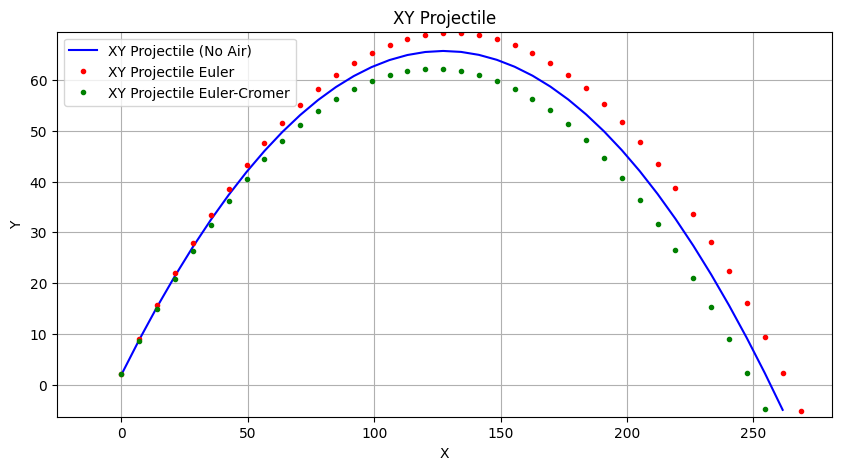

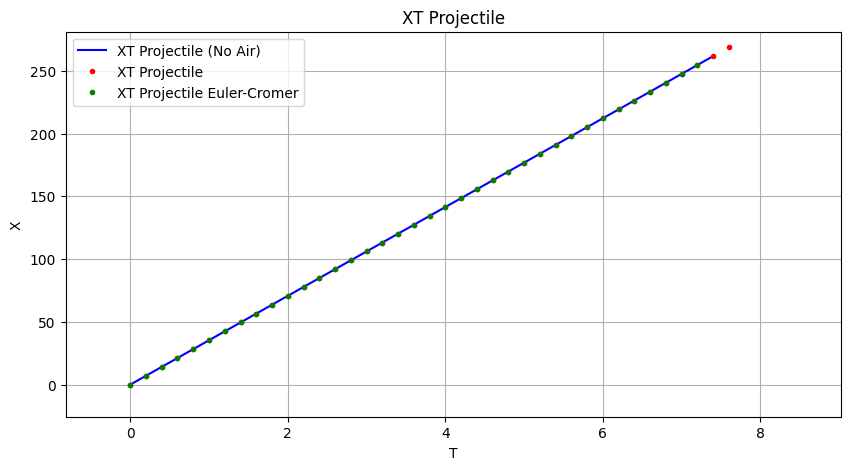

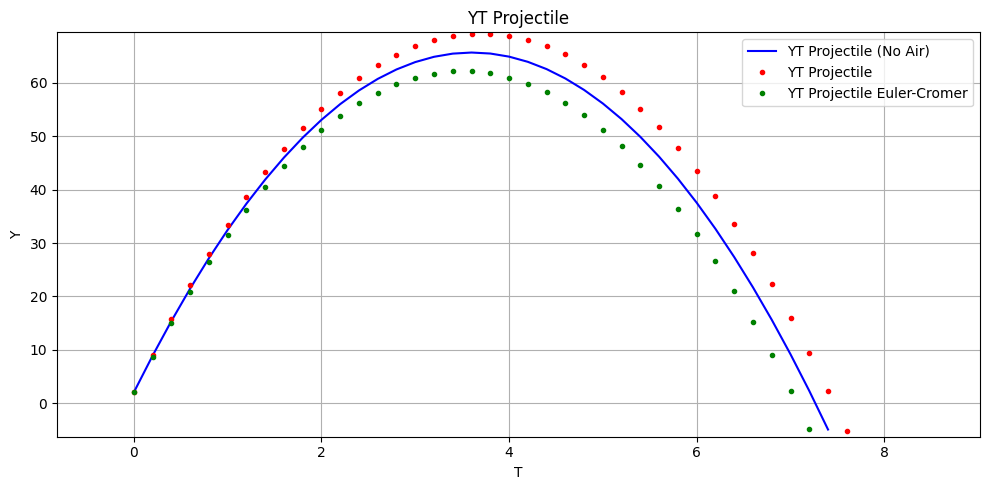

In [8]:
xcanvas = 1000
ycanvas = 500

# Create figures and axes for the XY projectile plot, XT projectile plot, and YT projectile plot
fig1, ax1 = plt.subplots(figsize=(xcanvas / 100, ycanvas / 100))
fig2, ax2 = plt.subplots(figsize=(xcanvas / 100, ycanvas / 100))
fig3, ax3 = plt.subplots(figsize=(xcanvas / 100, ycanvas / 100))

# Plot the XY projectile data
ax1.plot(xNoAir, yNoAir, 'b-', label='XY Projectile (No Air)')
ax1.plot(xplot, yplot, 'r.', label='XY Projectile Euler')
ax1.plot(xplotec, yplotec, 'g.', label='XY Projectile Euler-Cromer')
ax1.set_title('XY Projectile')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_xlim(-0.1 * max_x, 1.1 * max_x)
ax1.set_ylim(-0.1 * max_y, 1.1 * max_y)
ax1.grid()
ax1.legend()

# Plot the XT projectile data
ax2.plot(timeNoAir, xNoAir, 'b-', label='XT Projectile (No Air)')
ax2.plot(time, xplot, 'r.', label='XT Projectile')
ax2.plot(timeec, xplotec, 'g.', label='XT Projectile Euler-Cromer')
ax2.set_title('XT Projectile')
ax2.set_xlabel('T')
ax2.set_ylabel('X')
ax2.set_xlim(-0.1 * max_t, 1.1 * max_t)
ax2.set_ylim(-0.1 * max_x, 1.1 * max_x)
ax2.grid()
ax2.legend()

# Plot the YT projectile data
ax3.plot(timeNoAir, yNoAir, 'b-', label='YT Projectile (No Air)')
ax3.plot(time, yplot, 'r.', label='YT Projectile')
ax3.plot(timeec, yplotec, 'g.', label='YT Projectile Euler-Cromer')
ax3.set_title('YT Projectile')
ax3.set_xlabel('T')
ax3.set_ylabel('Y')
ax3.set_xlim(-0.1 * max_t, 1.1 * max_t)
ax3.set_ylim(-0.1 * max_y, 1.1 * max_y)
ax3.grid()
ax3.legend()

# Show the plots
plt.tight_layout()
plt.show()

# MidPoint Method

In the midpoint method, the velocity is updated at the endpoint of the interval, and then position is updated by calculating an average velocity
at the midpoint of the interval.  The midpoint method is given by:


$$ v_x(t+\tau) = v_x(t) + \tau a_x(t)$$
$$ v_y(t+\tau) = v_y(t) + \tau a_y(t)$$
$$ x(t+\tau) = x(t) + \tau \frac{v_x(t) + v_x(t+\tau)}{2}$$
$$ y(t+\tau) = y(t) + \tau \frac{v_y(t) + v_y(t+\tau)}{2}$$

If we substitute the expressions for the velocities into the expressions for the positions, we get:

$$ x(t+\tau) = x(t) + \tau v_x(t) + \frac{\tau^2}{2} a_x(t)$$
$$ y(t+\tau) = y(t) + \tau v_y(t) + \frac{\tau^2}{2} a_y(t)$$

This is the same as the Taylor expansion of the position to second order in $\tau$:

$$ x(t+\tau) = x(t) + \tau \frac{dx}{dt} + \frac{\tau^2}{2} \frac{d^2x}{dt^2} + O(\tau^3)$$

$$ y(t+\tau) = y(t) + \tau \frac{dy}{dt} + \frac{\tau^2}{2} \frac{d^2y}{dt^2} + O(\tau^3)$$

The midpoint method is time-reversible, just like the Euler-Cromer method.




In [9]:
# Initial position
r1mp = array('d')
# Initial velocity
v1mp = array('d')
# Position as a function of time
rmp = array('d')
# Velocity as a function of time
vmp = array('d')
# Acceleration as a function of time
accelmp = array('d')

# Set the initial values of position and velocity
r1mp.append(0)
r1mp.append(y1)
v1mp.append(speed*math.cos(theta*Pi/180.0))
v1mp.append(speed*math.sin(theta*Pi/180.0))

# Set the first elements of the position and velocity arrays
rmp.append(r1mp[0])
rmp.append(r1mp[1])
vmp.append(v1mp[0])
vmp.append(v1mp[1])

# Set the first elements of the acceleration array (in this problem, the acceleration is constant, but in general it might not be)
accelmp.append(0)
accelmp.append(-grav)

tau = tau_value # timestep in seconds
maxStep = 1000000 # maximum number of steps

# Create arrays to store the x and y positions and velocities as a function of time as well as the time, itself, for both the numerical method and the analytical method (NoAir).
xplotmp = array('d')
yplotmp = array('d')
xNoAirmp = array('d')
yNoAirmp = array('d')
timemp  = array('d')
timeNoAirmp = array('d')

endtime = 0
nelements = 0

# start looping ... we will break out of this loop when:
# a) the projectile hits the ground (y < 0)
# b) the y-velocity is negative (i.e., the projectile is moving down)
# 


for iStep in range(1,maxStep+1):
    xplotmp.append(rmp[0])
    yplotmp.append(rmp[1])
    t = (iStep-1)*tau
    timeNoAirmp.append(t)
    xNoAirmp.append(r1mp[0]+v1mp[0]*t)
    yNoAirmp.append(r1mp[1]+v1mp[1]*t-0.5*grav*t*t)
    accelmp[0]=0.0
    accelmp[1]=-1.0*grav
    
    # Euler Method
    #r[0] = r[0] + tau*v[0]
    #r[1] = r[1] + tau*v[1]
    #v[0] = v[0] + tau*accel[0]
    #v[1] = v[1] + tau*accel[1]
    
    # Euler-Cromer Method
    #vec[0] = vec[0] + tau*accelec[0]
    #vec[1] = vec[1] + tau*accelec[1]    
    #rec[0] = rec[0] + tau*vec[0]
    #rec[1] = rec[1] + tau*vec[1]
    
    # MidPoint Method
    vxnew = vmp[0] + tau*accelmp[0]
    vynew = vmp[1] + tau*accelmp[1]
    rmp[0] = rmp[0] + tau*(vmp[0] + vxnew)/2.0
    rmp[1] = rmp[1] + tau*(vmp[1] + vynew)/2.0
    vmp[0] = vxnew
    vmp[1] = vynew
    
    #print ("x = %f     vx = %f    ax = %f" %(rmp[0],vmp[0],accelmp[0]))
    #print ("y = %f     vy = %f    ay = %f" %(rmp[1],vmp[1],accelmp[1]))
    
    timemp.append(tau*(iStep-1))
    
    if (rmp[1] < 0):
        xplotmp.append(rmp[0])
        yplotmp.append(rmp[1])
        timemp.append(tau*iStep)
        endtime = tau*iStep
        nelements = iStep
        break
        
max_y = np.amax(yplotmp)+1
max_x = np.amax(xplotmp)+1
max_t = np.amax(timemp)+1

print ("Maximum range is %f meters." % rmp[0])
print ("Theory maximum range is %f meters." % (speed*speed/grav*math.sin(2.0*theta*Pi/180.0)))
print (" ")

print ("Time of flight is %f seconds." % (max_t-1))
print ("Theory time of flight is %f seconds." % (2.0*speed/grav*math.sin(theta*Pi/180.0)))
print (" ")

print ("Max y = %f" % (max_y-1))
print ("Theory Max y = %f" % (speed*speed/(2.0*grav)*math.pow(math.sin(theta*Pi/180.0),2)))
print (" ")


print ("Number of elements = %d" % nelements)

Maximum range is 261.629509 meters.
Theory maximum range is 254.841998 meters.
 
Time of flight is 7.400000 seconds.
Theory time of flight is 7.208020 seconds.
 
Max y = 65.710421
Theory Max y = 63.710499
 
Number of elements = 37


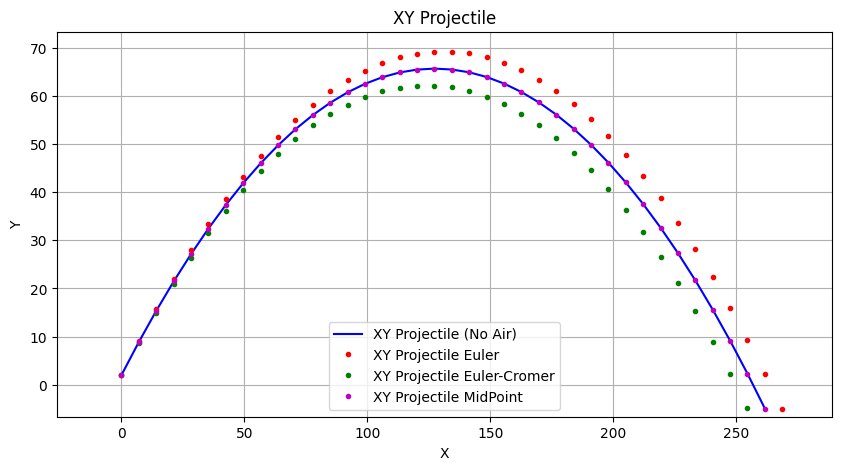

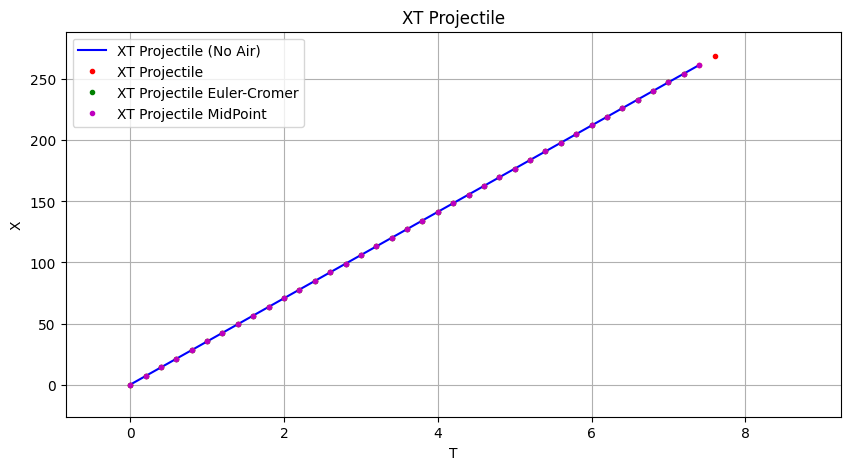

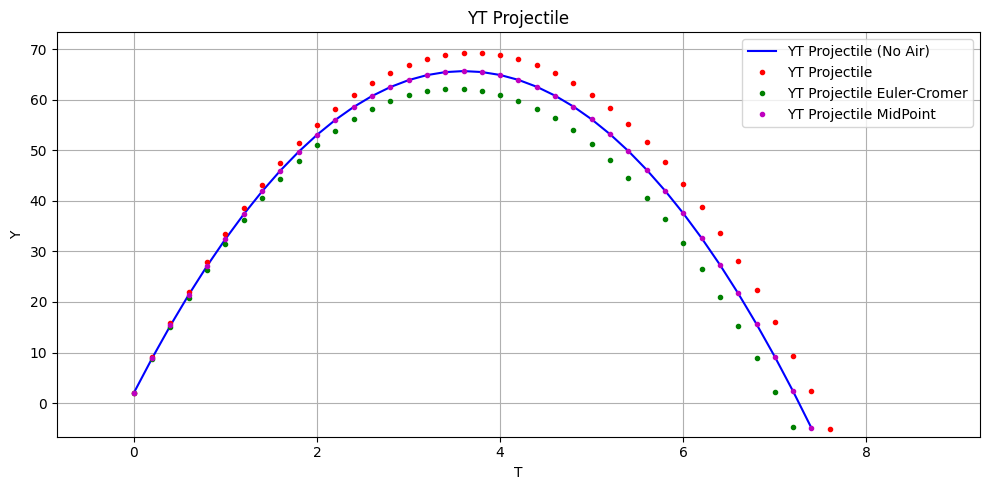

In [10]:
xcanvas = 1000
ycanvas = 500

# Create figures and axes for the XY projectile plot, XT projectile plot, and YT projectile plot
fig1, ax1 = plt.subplots(figsize=(xcanvas / 100, ycanvas / 100))
fig2, ax2 = plt.subplots(figsize=(xcanvas / 100, ycanvas / 100))
fig3, ax3 = plt.subplots(figsize=(xcanvas / 100, ycanvas / 100))

# Plot the XY projectile data
ax1.plot(xNoAir, yNoAir, 'b-', label='XY Projectile (No Air)')
ax1.plot(xplot, yplot, 'r.', label='XY Projectile Euler')
ax1.plot(xplotec, yplotec, 'g.', label='XY Projectile Euler-Cromer')
ax1.plot(xplotmp, yplotmp, 'm.', label='XY Projectile MidPoint')
ax1.set_title('XY Projectile')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_xlim(-0.1 * max_x, 1.1 * max_x)
ax1.set_ylim(-0.1 * max_y, 1.1 * max_y)
ax1.grid()
ax1.legend()

# Plot the XT projectile data
ax2.plot(timeNoAir, xNoAir, 'b-', label='XT Projectile (No Air)')
ax2.plot(time, xplot, 'r.', label='XT Projectile')
ax2.plot(timeec, xplotec, 'g.', label='XT Projectile Euler-Cromer')
ax2.plot(timemp, xplotmp, 'm.', label='XT Projectile MidPoint')
ax2.set_title('XT Projectile')
ax2.set_xlabel('T')
ax2.set_ylabel('X')
ax2.set_xlim(-0.1 * max_t, 1.1 * max_t)
ax2.set_ylim(-0.1 * max_x, 1.1 * max_x)
ax2.grid()
ax2.legend()

# Plot the YT projectile data
ax3.plot(timeNoAir, yNoAir, 'b-', label='YT Projectile (No Air)')
ax3.plot(time, yplot, 'r.', label='YT Projectile')
ax3.plot(timeec, yplotec, 'g.', label='YT Projectile Euler-Cromer')
ax3.plot(timemp, yplotmp, 'm.', label='YT Projectile MidPoint')
ax3.set_title('YT Projectile')
ax3.set_xlabel('T')
ax3.set_ylabel('Y')
ax3.set_xlim(-0.1 * max_t, 1.1 * max_t)
ax3.set_ylim(-0.1 * max_y, 1.1 * max_y)
ax3.grid()
ax3.legend()

# Show the plots
plt.tight_layout()
plt.show()

# Conclusions

The Euler method is the simplest of the numerical methods for solving differential equations.  It is based on the idea that the derivative of a function can be approximated by a finite difference.  

The Euler-Cromer method is a slight modification of the Euler method.  The only difference is that the velocity is updated before the position.  This is done to make the algorithm more stable.

In the midpoint method, the velocity is updated at the endpoint of the interval, and then position is updated by calculating an average velocity
at the midpoint of the interval.

For this particular problem (no air resistance), all three methods give the same result, provided that $\tau$ is small enough.  However, for problems with air resistance, the Euler method is not very accurate.  The Euler-Cromer method is more accurate, but the midpoint method is the most accurate of the three methods.